# Coding copilot with Autogen

In [3]:
## import required libraries
import os
from autogen import AssistantAgent, ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor
from dotenv import load_dotenv

load_dotenv(override=True)

True

In [27]:
## llm configuration
llm_config = {
    "model": "gpt-4o",
    "api_key": os.getenv("OPENAI_API_KEY")
}

## Create an executor instance

In [28]:
executor = LocalCommandLineCodeExecutor(
    timeout=10,
    work_dir="coding"
)

## Defining agents

In [29]:
# agent with code executor config
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'"
)

In [30]:
# agent with code writing ability
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER"
)

In [31]:
code_writer_agent_system_message = code_writer_agent.system_message

In [32]:
code_writer_agent_system_message

'You are a helpful AI assistant.\nSolve tasks using your coding and language skills.\nIn the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.\n    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.\n    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.\nSolve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.\nWhen using code, you must indicate the script type in the code block. The user cannot provide any oth

## Defining stock analysis task

- The code writer agent writes the analysis code.
- The executor will execute it.

In [33]:
from datetime import date

current_date = date.today()

instruction = f"""
As of {current_date}, please generate a graph displaying the year-to-date (YTD) stock performance for NVIDIA (NVDA) and Tesla (TSLA).

Ensure that you:
1. Write the necessary code within a markdown code block
2. Save the resulting graph as an image file named 'ytd_stock_gains.png'
"""

In [34]:
## initiate the chat
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=instruction,
)

code_executor_agent (to code_writer_agent):


As of 2025-08-09, please generate a graph displaying the year-to-date (YTD) stock performance for NVIDIA (NVDA) and Tesla (TSLA).

Ensure that you:
1. Write the necessary code within a markdown code block
2. Save the resulting graph as an image file named 'ytd_stock_gains.png'


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To generate a graph displaying the year-to-date (YTD) stock performance for NVIDIA (NVDA) and Tesla (TSLA) as of August 9, 2025, you can follow this plan:

1. **Collect Stock Data**: We'll use the `yfinance` library to fetch historical stock data for NVDA and TSLA from the beginning of 2025 to August 9, 2025.
2. **Calculate YTD Performance**: Calculate the percentage change in the stock price from the start of the year (January 1, 2025) to the current date (August 9, 2025).
3. **Plot the Data**: Use `matplotlib` to plot the YTD performance of

Replying as code_executor_agent. Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation: exit

>>>>>>>> TERMINATING RUN (9ea55626-a654-49f5-abf6-131cb5c1a20a): User requested to end the conversation


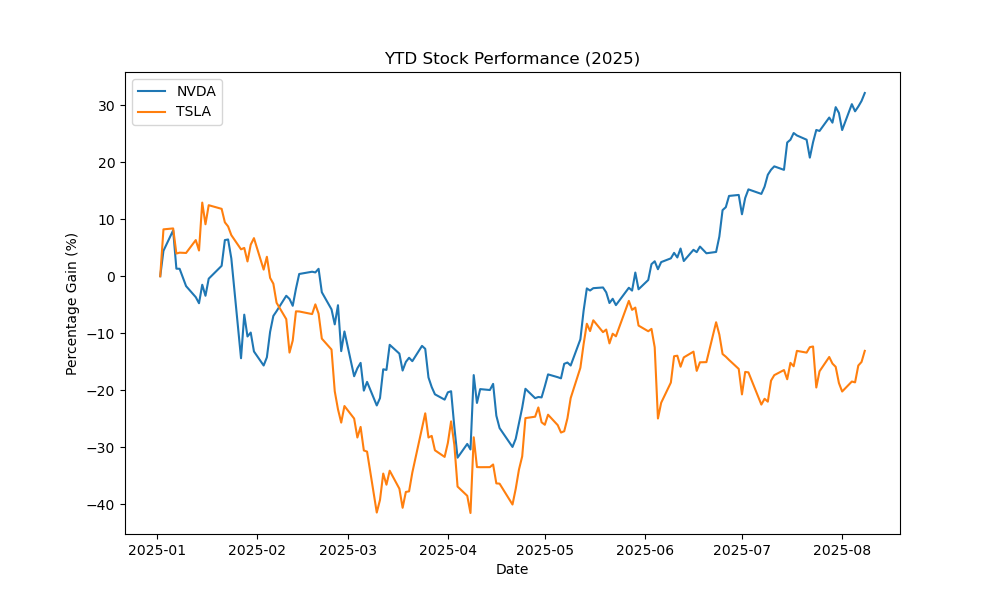

In [35]:
import os
from IPython.display import Image
Image(os.path.join("coding", "ytd_stock_gains.png"))